In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    TBATS
)

from darts.models import AutoARIMA
from darts import TimeSeries

from statsmodels.tsa.stattools import adfuller


In [34]:
df = pd.read_excel("datasets/quantidade_media_prod_tri.xlsx")

In [35]:
df.columns

Index(['ano', 'mês', 'dia_do_mes', 'descricao_prod', 'quantidade_total',
       'quantidade_media'],
      dtype='object')

In [36]:
df['dia_do_mes'] = df['dia_do_mes'].fillna(method='ffill')

/tmp/ipykernel_3573/3781038820.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['dia_do_mes'] = df['dia_do_mes'].fillna(method='ffill')


In [37]:
df = df.query('not descricao_prod.str.contains("Kit") and not descricao_prod.str.contains("Box") and not descricao_prod.str.contains("Pasta")')

In [38]:
df['descricao_prod'].unique()

array(['Petisco Natural Sabor Frango com Batata Doce - 100g',
       'Petisco Natural Sabor Steak de Angus - 100g',
       'Petí Mini - Petisco Natural Sabor Steak Prime - 20g',
       'Petí Stick - Mordedor de madeira de café (20cm)',
       'Petí Mini - Petisco Natural Sabor Cordeiro - 20g',
       'Petí Mini - Petisco Natural Sabor Frango com Batata Doce - 20g',
       'Petí Mini - Petisco Natural Sabor Tilápia - 20g',
       'Petisco Natural Sabor Cordeiro - 80g',
       'Petisco Natural Sabor Tilápia - 80g',
       'Petí BSF é Calm - Petisco Natural',
       'Petí Tronquinho - Mordedor de madeira de café (25cm)',
       'Petisco Natural Sabor Steak Prime - 100g',
       'Suplemento Peti Granola 130g', 'Suplemento Peti Topper Calm 100g',
       'Petí BSF é Calm 94g - Petisco Natural'], dtype=object)

In [39]:
df['data'] = pd.to_datetime({'year': df['ano'],
                             'month': df['mês'],
                             'day' : df['dia_do_mes']}, format='d%/m%/y%')

In [40]:
df['fornecedor'] =  df['descricao_prod'].apply(lambda x: 'GMP' if 'Petisco Natural Sabor' in x else 
                                               ('Laboratório Oriente - Suplementos' if 'Suplemento' in x else 
                                                ('Padaria Pet' if 'BSF' in x else 'Amicus')))

In [41]:
df['fornecedor']

0                                     GMP
1                                     GMP
2                                     GMP
3                                     GMP
4                                     GMP
                      ...                
3213                                  GMP
3214                                  GMP
3215                                  GMP
3216    Laboratório Oriente - Suplementos
3217    Laboratório Oriente - Suplementos
Name: fornecedor, Length: 2736, dtype: object

In [42]:
df[df['fornecedor'] == 'Padaria Pet'] 

,ano,mês,dia_do_mes,descricao_prod,quantidade_total,quantidade_media,data,fornecedor
1676,2024,8,5.0,Petí BSF é Calm - Petisco Natural,8.0,2.000000,2024-08-05,Padaria Pet
1678,2024,8,6.0,Petí BSF é Calm - Petisco Natural,67.0,33.500000,2024-08-06,Padaria Pet
1684,2024,8,8.0,Petí BSF é Calm - Petisco Natural,18.0,9.000000,2024-08-08,Padaria Pet
1689,2024,8,12.0,Petí BSF é Calm - Petisco Natural,30.0,6.000000,2024-08-12,Padaria Pet
1697,2024,8,13.0,Petí BSF é Calm - Petisco Natural,11.0,2.750000,2024-08-13,Padaria Pet
...,...,...,...,...,...,...,...,...
3167,2025,11,10.0,Petí BSF é Calm 94g - Petisco Natural,1.0,1.000000,2025-11-10,Padaria Pet
3174,2025,11,13.0,Petí BSF é Calm 94g - Petisco Natural,22.0,5.500000,2025-11-13,Padaria Pet
3183,2025,11,14.0,Petí BSF é Calm 94g - Petisco Natural,20.0,20.000000,2025-11-14,Padaria Pet
3198,2025,11,18.0,Petí BSF é Calm 94g - Petisco Natural,25.0,8.333333,2025-11-18,Padaria Pet


In [43]:
df_gmp = df[df['fornecedor'] == 'GMP']

In [44]:
df['Petisco Natural Sabor Steak Prime - 100g'] = df['Petisco Natural Sabor Steak Prime - 100g']  + df['Petisco Natural Sabor Steak de Angus - 100g']


df['Petisco Natural Sabor Steak Prime - 100g']

KeyError: 'Petisco Natural Sabor Steak Prime - 100g'

In [ ]:
df_gmp['descricao_prod'].unique()

array(['Petisco Natural Sabor Frango com Batata Doce - 100g',
       'Petisco Natural Sabor Steak de Angus - 100g',
       'Petí Mini - Petisco Natural Sabor Steak Prime - 20g',
       'Petí Mini - Petisco Natural Sabor Cordeiro - 20g',
       'Petí Mini - Petisco Natural Sabor Frango com Batata Doce - 20g',
       'Petí Mini - Petisco Natural Sabor Tilápia - 20g',
       'Petisco Natural Sabor Cordeiro - 80g',
       'Petisco Natural Sabor Tilápia - 80g',
       'Petisco Natural Sabor Steak Prime - 100g'], dtype=object)

In [ ]:
df_gmp

,ano,mês,dia_do_mes,descricao_prod,quantidade_total,quantidade_media,data,fornecedor
0,2021,7,27.0,Petisco Natural Sabor Frango com Batata Doce -...,5.0,5.000000,2021-07-27,GMP
1,2021,7,27.0,Petisco Natural Sabor Steak de Angus - 100g,5.0,5.000000,2021-07-27,GMP
2,2021,8,2.0,Petisco Natural Sabor Frango com Batata Doce -...,1.0,1.000000,2021-08-02,GMP
3,2021,8,2.0,Petisco Natural Sabor Steak de Angus - 100g,3.0,1.000000,2021-08-02,GMP
4,2021,8,3.0,Petisco Natural Sabor Frango com Batata Doce -...,7.0,2.333333,2021-08-03,GMP
...,...,...,...,...,...,...,...,...
3210,2025,11,19.0,Petisco Natural Sabor Tilápia - 80g,17.0,8.500000,2025-11-19,GMP
3212,2025,11,19.0,Petí Mini - Petisco Natural Sabor Cordeiro - 20g,4.0,4.000000,2025-11-19,GMP
3213,2025,11,19.0,Petí Mini - Petisco Natural Sabor Frango com B...,4.0,4.000000,2025-11-19,GMP
3214,2025,11,19.0,Petí Mini - Petisco Natural Sabor Steak Prime ...,4.0,4.000000,2025-11-19,GMP


In [ ]:
df_gmp_wk = pd.DataFrame(df_gmp.groupby([pd.Grouper(key='data', freq='W-MON'), 'descricao_prod'])['quantidade_total'].sum())
df_gmp_me = pd.DataFrame(df_gmp.groupby([pd.Grouper(key='data', freq='ME'), 'descricao_prod'])['quantidade_total'].sum())


In [ ]:
df_gmp_wk.reset_index(inplace=True)
df_gmp_me.reset_index(inplace=True)

### Modelagem

In [ ]:
df_wk = pd.DataFrame(df.groupby([pd.Grouper(key='data', freq='W-MON'), 'descricao_prod'])['quantidade_total'].sum())
df_me = pd.DataFrame(df.groupby([pd.Grouper(key='data', freq='ME'), 'descricao_prod'])['quantidade_total'].sum())

In [ ]:
df_wk.reset_index(inplace=True)
df_me.reset_index(inplace=True)

In [ ]:
df_pivot = df_me.pivot_table(
    index='data',
    columns='descricao_prod',
    values='quantidade_total',
    fill_value=0
)
#df_pivot.drop('Petisco Natural Sabor Steak Prime - 100g', axis=1, inplace=True)


In [ ]:
df_pivot["Petisco Natural Sabor Steak Prime - 100g"] = (
    df_pivot["Petisco Natural Sabor Steak Prime - 100g"]
    + df_pivot["Petisco Natural Sabor Steak de Angus - 100g"]
)



df_pivot["Petí BSF é Calm 94g - Petisco Natural"] = (
    df_pivot["Petí BSF é Calm 94g - Petisco Natural"]
    + df_pivot["Petí BSF é Calm - Petisco Natural"]
)

df_pivot.drop(
    [
        "Petí BSF é Calm - Petisco Natural",
        "Petisco Natural Sabor Steak de Angus - 100g",
    ],
    inplace=True,
    axis=1,
)


    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    TBATS

In [ ]:
m_expon = ExponentialSmoothing()

m_prophet_m = Prophet(seasonality_mode="multiplicative")

m_prophet_a = Prophet(seasonality_mode="additive")

m_n_seasonal = NaiveSeasonal()

m_n_drift = NaiveDrift()

m_arima = ARIMA(0,0,0)

m_tbats = TBATS(season_length=4)

#m_autoarima_stats =AutoARIMA(season_length=4)



models =[
    m_expon,
    m_prophet_m,
    m_prophet_a,
    m_n_seasonal,
    m_n_drift,
    m_arima,
    m_tbats
 #   m_autoarima_stats
]



In [ ]:
from darts.metrics import mape, mase, mae, mse, ope, r2_score, rmse, rmsle
import time

def eval_model(model, train, val, df_name):
    t_start =  time.perf_counter()
    print("beginning: " + str(model))


    # fit the model and compute predictions
    res = model.fit(train)
    forecast = model.predict(len(val)+6)
    try:
    # compute accuracy metrics and processing time
        res_mape = mape(val, forecast)
        res_mae = mae(val, forecast)
        res_r2 = r2_score(val, forecast)
        res_rmse = rmse(val, forecast)
        res_rmsle = rmsle(val, forecast)
        res_time = time.perf_counter() - t_start
        res_accuracy = {"MAPE":res_mape, "MAE":res_mae, "R squared":-res_r2, "RMSE":res_rmse, "RMSLE":res_rmsle, "time":res_time}

        results = [forecast, res_accuracy, res]
        print("completed: " + str(model) + ":" + str(res_time) + "sec")
        model.fit(train)
        prediction = model.predict(len(val)+6)  
        plt.figure()  
        series.plot(label='actual')
        prediction.plot(label='forecast', lw=3)
        plt.legend()
        plt.title(f"Previsão de {df_name} - modelo {str(model).split("())")[0]}")
    except ValueError:
        res_mae = mae(val, forecast)
        res_r2 = r2_score(val, forecast)
        res_rmse = rmse(val, forecast)
        res_rmsle = rmsle(val, forecast)
        res_time = time.perf_counter() - t_start
        res_accuracy = {"MAE":res_mae, "R squared":-res_r2, "RMSE":res_rmse, "RMSLE":res_rmsle, "time":res_time}
        results = [forecast, res_accuracy, res]
        print("completed: " + str(model) + ":" + str(res_time) + "sec")
        model.fit(train)
        prediction = model.predict(len(val)+6)  
        plt.figure()  
        series.plot(label='actual')
        prediction.plot(label='forecast', lw=3)
        plt.legend()
        plt.title(f"Previsão de {df_name} - modelo {str(model).split("())")[0]}")

    return results

Criando previsão de saída de Estoque para Petisco Natural Sabor Cordeiro - 80g
beginning: ExponentialSmoothing()
completed: ExponentialSmoothing():0.07439964499999974sec
beginning: Prophet(seasonality_mode=multiplicative)


01:50:25 - cmdstanpy - INFO - Chain [1] start processing


KeyboardInterrupt: 

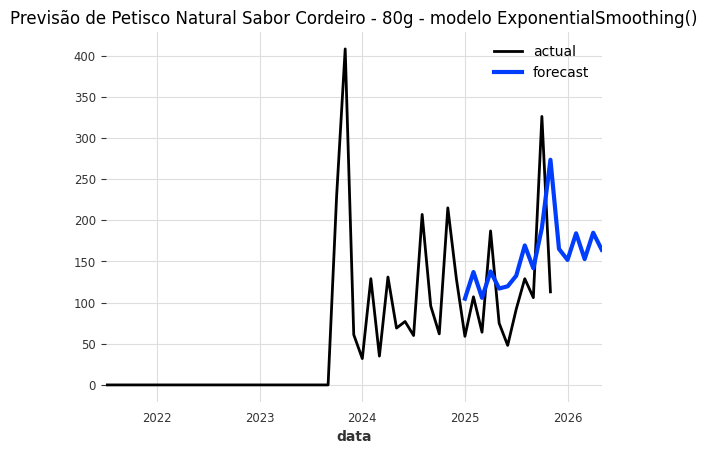

In [ ]:
k=0
df_pred = pd.DataFrame()
for i in df_pivot.columns:
    df_pred_list = []
    df_  = df_pivot.iloc[:,k:k+1]
    series = TimeSeries.from_dataframe(df=df_, fill_missing_dates=True, fillna_value=0, freq='ME')
    train, val = series.split_before(pd.Timestamp('20250101'))
    print(f"Criando previsão de saída de Estoque para {i}")
    model_predictions= [eval_model(model, train, val, i) for model in models]
    result = adfuller(series.to_dataframe())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] <= 0.05:
        print("Reject the null hypothesis: The series is stationary")
    else:
        print("Fail to reject the null hypothesis: The series is non-stationary")
    df_acc = pd.DataFrame.from_dict(model_predictions[0][1], orient="index")
    df_acc.columns = [str(models[0])]
    for j, m in enumerate(models):
        if j > 0:
            df = pd.DataFrame.from_dict(model_predictions[j][1], orient="index")
            df.columns = [str(m)]
            df_acc = pd.concat([df_acc, df], axis=1)
        j +=1
    df_min = df_acc.idxmin(axis=1)
    for m in models:
        if str(m) in df_min.RMSE:
            forecast = m.predict(len(val)+6)
            df_i = forecast.to_dataframe()
            if df_i.max().iloc[0] != 0:
                df_pred = pd.concat([df_pred, df_i], axis=1)
            else:
                pass
    print(df_acc)
    plt.show()
    k+=1




In [ ]:
df_pred

,Petisco Natural Sabor Cordeiro - 80g,Petisco Natural Sabor Frango com Batata Doce - 100g,Petisco Natural Sabor Steak de Angus - 100g,Petisco Natural Sabor Tilápia - 80g,Petí BSF é Calm - Petisco Natural,Petí Mini - Petisco Natural Sabor Cordeiro - 20g,Petí Mini - Petisco Natural Sabor Frango com Batata Doce - 20g,Petí Mini - Petisco Natural Sabor Steak Prime - 20g,Petí Mini - Petisco Natural Sabor Tilápia - 20g,Petí Stick - Mordedor de madeira de café (20cm),Petí Tronquinho - Mordedor de madeira de café (25cm)
data,,,,,,,,,,,
2025-01-31,104.753469,140.0,191.0,83.553586,26.952318,44.285713,48.999998,52.619046,47.714284,116.780488,56.341463
2025-02-28,137.067200,140.0,191.0,106.671987,26.952318,44.285713,48.999998,52.619046,47.714284,119.560976,57.682927
2025-03-31,105.766740,140.0,191.0,126.365702,26.952318,44.285713,48.999998,52.619046,47.714284,122.341463,59.024390
2025-04-30,137.742609,140.0,191.0,107.411730,26.952318,44.285713,48.999998,52.619046,47.714284,125.121951,60.365854
2025-05-31,117.087929,140.0,191.0,91.882442,26.952318,44.285713,48.999998,52.619046,47.714284,127.902439,61.707317
2025-06-30,119.750444,140.0,191.0,115.000843,26.952318,44.285713,48.999998,52.619046,47.714284,130.682927,63.048780
2025-07-31,132.624390,140.0,191.0,134.694558,26.952318,44.285713,48.999998,52.619046,47.714284,133.463415,64.390244
2025-08-31,169.376952,140.0,191.0,115.740586,26.952318,44.285713,48.999998,52.619046,47.714284,136.243902,65.731707
2025-09-30,141.631660,140.0,191.0,100.211299,26.952318,44.285713,48.999998,52.619046,47.714284,139.024390,67.073171


### Expectativa de Saldo de Estoque

In [ ]:
df_estoq = pd.read_excel("datasets/quantidade_total_produtos_simples.xlsx")
df_estoq = df_estoq.iloc[:,1:]
df_estoq.rename(columns={"saldo_fisico_produto": "Saldo Atual"}, inplace=True)

In [ ]:
df_estoq_pivot = pd.pivot_table(data=df_estoq, columns='descricao_prod', values='Saldo Atual')

df_estoq_pivot

descricao_prod,Pasta de amendoim canina - 300g,Petisco Natural Sabor Cordeiro - 80g,Petisco Natural Sabor Frango com Batata Doce - 100g,Petisco Natural Sabor Steak Prime - 100g,Petisco Natural Sabor Tilápia - 80g,Petí BSF é Calm 94g - Petisco Natural,Petí Mini - Petisco Natural Sabor Cordeiro - 20g,Petí Mini - Petisco Natural Sabor Frango com Batata Doce - 20g,Petí Mini - Petisco Natural Sabor Steak Prime - 20g,Petí Mini - Petisco Natural Sabor Tilápia - 20g,Petí Stick - Mordedor de madeira de café (20cm),Petí Tronquinho - Mordedor de madeira de café (25cm),Suplemento Peti Granola 130g,Suplemento Peti Topper Calm 100g
Saldo Atual,0.0,537.0,470.0,648.0,450.0,1738.0,550.0,578.0,558.0,532.0,318.0,209.0,271.0,211.0


In [ ]:
df_fut = df_pred[11:]


In [ ]:
df_estoq_fut  = pd.concat([df_estoq_pivot, -df_fut])
df_estoq_fut.dropna(axis=1, inplace=True)
df_estoq_fut

,Petisco Natural Sabor Cordeiro - 80g,Petisco Natural Sabor Frango com Batata Doce - 100g,Petisco Natural Sabor Tilápia - 80g,Petí Mini - Petisco Natural Sabor Cordeiro - 20g,Petí Mini - Petisco Natural Sabor Frango com Batata Doce - 20g,Petí Mini - Petisco Natural Sabor Steak Prime - 20g,Petí Mini - Petisco Natural Sabor Tilápia - 20g,Petí Stick - Mordedor de madeira de café (20cm),Petí Tronquinho - Mordedor de madeira de café (25cm)
Saldo Atual,537.000000,470.0,450.000000,550.000000,578.000000,558.000000,532.000000,318.000000,209.000000
2025-12-31 00:00:00,-165.142305,-140.0,-124.069442,-44.285713,-48.999998,-52.619046,-47.714284,-147.365854,-71.097561
2026-01-31 00:00:00,-151.803464,-140.0,-108.540155,-44.285713,-48.999998,-52.619046,-47.714284,-150.146341,-72.439024
2026-02-28 00:00:00,-184.117195,-140.0,-131.658555,-44.285713,-48.999998,-52.619046,-47.714284,-152.926829,-73.780488
2026-03-31 00:00:00,-152.816735,-140.0,-151.352270,-44.285713,-48.999998,-52.619046,-47.714284,-155.707317,-75.121951
2026-04-30 00:00:00,-184.792603,-140.0,-132.398298,-44.285713,-48.999998,-52.619046,-47.714284,-158.487805,-76.463415
2026-05-31 00:00:00,-164.137924,-140.0,-116.869011,-44.285713,-48.999998,-52.619046,-47.714284,-161.268293,-77.804878


In [ ]:
df_estoq_fut = df_estoq_fut.cumsum()


In [ ]:
df_estoq_fut.to_csv("datasets/estoque_futuro_estimado.csv")
df_estoq_fut.to_excel("estoque_futuro_estimado.xlsx")

In [ ]:
df_estoq_fut.iloc[:,0]

Saldo Atual            537.000000
2025-12-31 00:00:00    371.857695
2026-01-31 00:00:00    220.054231
2026-02-28 00:00:00     35.937036
2026-03-31 00:00:00   -116.879699
2026-04-30 00:00:00   -301.672302
2026-05-31 00:00:00   -465.810226
Name: Petisco Natural Sabor Cordeiro - 80g, dtype: float64

In [ ]:
round(df_estoq_fut)

,Petisco Natural Sabor Cordeiro - 80g,Petisco Natural Sabor Frango com Batata Doce - 100g,Petisco Natural Sabor Tilápia - 80g,Petí Mini - Petisco Natural Sabor Cordeiro - 20g,Petí Mini - Petisco Natural Sabor Frango com Batata Doce - 20g,Petí Mini - Petisco Natural Sabor Steak Prime - 20g,Petí Mini - Petisco Natural Sabor Tilápia - 20g,Petí Stick - Mordedor de madeira de café (20cm),Petí Tronquinho - Mordedor de madeira de café (25cm)
Saldo Atual,537.0,470.0,450.0,550.0,578.0,558.0,532.0,318.0,209.0
2025-12-31 00:00:00,372.0,330.0,326.0,506.0,529.0,505.0,484.0,171.0,138.0
2026-01-31 00:00:00,220.0,190.0,217.0,461.0,480.0,453.0,437.0,20.0,65.0
2026-02-28 00:00:00,36.0,50.0,86.0,417.0,431.0,400.0,389.0,-132.0,-8.0
2026-03-31 00:00:00,-117.0,-90.0,-66.0,373.0,382.0,348.0,341.0,-288.0,-83.0
2026-04-30 00:00:00,-302.0,-230.0,-198.0,329.0,333.0,295.0,293.0,-447.0,-160.0
2026-05-31 00:00:00,-466.0,-370.0,-315.0,284.0,284.0,242.0,246.0,-608.0,-238.0


In [ ]:
df_estoq_fut.style.highlight_between(left=None, right=0, color='red', axis=0)

,Petisco Natural Sabor Cordeiro - 80g,Petisco Natural Sabor Frango com Batata Doce - 100g,Petisco Natural Sabor Tilápia - 80g,Petí Mini - Petisco Natural Sabor Cordeiro - 20g,Petí Mini - Petisco Natural Sabor Frango com Batata Doce - 20g,Petí Mini - Petisco Natural Sabor Steak Prime - 20g,Petí Mini - Petisco Natural Sabor Tilápia - 20g,Petí Stick - Mordedor de madeira de café (20cm),Petí Tronquinho - Mordedor de madeira de café (25cm)
Saldo Atual,537.000000,470.000000,450.000000,550.000000,578.000000,558.000000,532.000000,318.000000,209.000000
2025-12-31 00:00:00,371.857695,330.000000,325.930558,505.714287,529.000002,505.380954,484.285716,170.634146,137.902439
2026-01-31 00:00:00,220.054231,190.000000,217.390403,461.428575,480.000003,452.761909,436.571432,20.487805,65.463415
2026-02-28 00:00:00,35.937036,50.000000,85.731848,417.142862,431.000005,400.142863,388.857148,-132.439024,-8.317073
2026-03-31 00:00:00,-116.879699,-90.000000,-65.620422,372.857149,382.000006,347.523817,341.142863,-288.146341,-83.439024
2026-04-30 00:00:00,-301.672302,-230.000000,-198.018720,328.571436,333.000008,294.904772,293.428579,-446.634146,-159.902439
2026-05-31 00:00:00,-465.810226,-370.000000,-314.887731,284.285724,284.000009,242.285726,245.714295,-607.902439,-237.707317
